In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [6]:
vg_df = pd.read_csv("Resources/Video_Games.csv")
vg_df

,metascore,name,userscore
0,97,Grand Theft Auto V,83.0
1,95,The Last of Us,92.0
2,94,BioShock Infinite,85.0
3,93,Super Mario 3D World,89.0
4,92,Fire Emblem: Awakening,91.0
...,...,...,...
9611,38,Dying: Reborn,52.0
9612,38,Randall,21.0
9613,36,Tokyo Tattoo Girls,54.0
9614,26,Road Rage,25.0


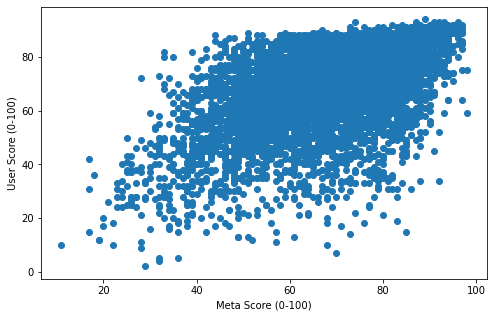

In [17]:
plt.figure(figsize=(8,5))
x_data, y_data = (vg_df["metascore"].values, vg_df["userscore"].values)
plt.scatter(x_data, y_data)
plt.xlabel('Meta Score (0-100)')
plt.ylabel('User Score (0-100)')
plt.show()


In [22]:
X = vg_df.metascore.values.reshape(-1,1)

In [23]:
X.shape

(9616, 1)

(9616,)


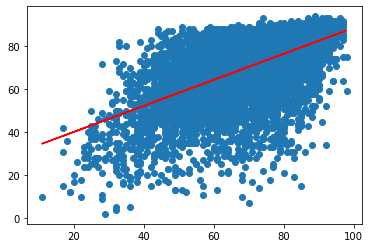

[0.60586223]
28.029701806792616


In [24]:
X.reshape(-1, 1)
y = vg_df.userscore
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X,y)
plt.plot(X, y_pred, color='red')
plt.show()

print(model.coef_)
print(model.intercept_)

In [25]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[11]]
Max X Value: [[98]]


In [26]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

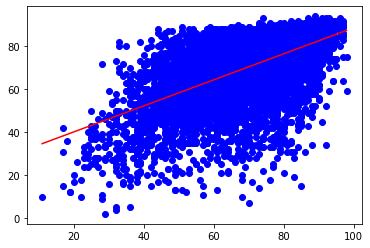

In [27]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [28]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.31802279174200065
Testing Score: 0.3538506845534709


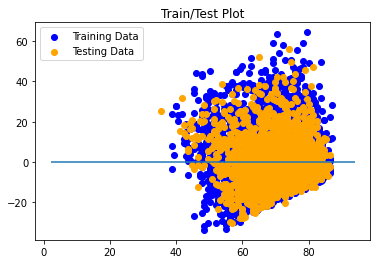

In [30]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c='blue', label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c='orange', label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Train/Test Plot")
plt.show()